<a href="https://colab.research.google.com/github/Al-ameen007/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data and some preprocessing

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow 
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Normalizing the data and one-hot encoding the labels
from tensorflow.keras.utils import to_categorical
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Splitting the data into training and validation sets as we want to save the test set for the evaluation of the best model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [5]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [6]:
saved_models = []
histories = []

# Base Model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), strides=(2, 2),activation='relu', kernel_initializer='truncated_normal', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
opt = optimizers.SGD(learning_rate=0.0001, momentum=0.9)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
opt_2 = optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
opt_4 = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
opt_5 = optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.1,)

In [9]:
def evaluate_model(saved_models, X, y):
  best_model, best_model_idx = saved_models[0], 0
  best_accuracy= (best_model.evaluate(X, y, verbose=1))[1]
  for i in range(1, len(saved_models)):
    loss, acc = saved_models[i].evaluate(X, y, verbose=1)
    if acc > best_accuracy:
      best_model, best_model_idx , best_accuracy= saved_models[i], i, acc
  print('model: ' + str(best_model_idx + 1), 'accuracy: ' + str('%.2f'%(best_accuracy * 100) + ' %'))
  return best_model, best_model_idx

In [10]:
def summaries(saved_models):
  for i in range(0, len(saved_models)):
    print('model: ' + str(i + 1))
    saved_models[i].summary()

# Trying differnt number of epochs

In [11]:
model_1 = keras.models.clone_model(model)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_1_history = model_1.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_1)
histories.append(model_1_history)

Epoch 1/10
1594/1594 [==============================] - 11s 6ms/step - loss: 2.0724 - accuracy: 0.3836 - val_loss: 1.7509 - val_accuracy: 0.5932
Epoch 2/10
1594/1594 [==============================] - 11s 7ms/step - loss: 1.2771 - accuracy: 0.7214 - val_loss: 0.8940 - val_accuracy: 0.7872
Epoch 3/10
1594/1594 [==============================] - 9s 6ms/step - loss: 0.7067 - accuracy: 0.8237 - val_loss: 0.5874 - val_accuracy: 0.8487
Epoch 4/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.5190 - accuracy: 0.8623 - val_loss: 0.4686 - val_accuracy: 0.8733
Epoch 5/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4377 - accuracy: 0.8803 - val_loss: 0.4087 - val_accuracy: 0.8856
Epoch 6/10
1594/1594 [==============================] - 9s 5ms/step - loss: 0.3919 - accuracy: 0.8900 - val_loss: 0.3698 - val_accuracy: 0.8970
Epoch 7/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3616 - accuracy: 0.8976 - val_loss: 0.3434 - val_accurac

In [12]:
model_2 = keras.models.clone_model(model)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_2_history = model_2.fit(X_train, y_train, epochs=15, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_2)
histories.append(model_2_history)

Epoch 1/15
1594/1594 [==============================] - 10s 6ms/step - loss: 2.0749 - accuracy: 0.4283 - val_loss: 1.7062 - val_accuracy: 0.6561
Epoch 2/15
1594/1594 [==============================] - 9s 5ms/step - loss: 1.1871 - accuracy: 0.7550 - val_loss: 0.8012 - val_accuracy: 0.8197
Epoch 3/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.6421 - accuracy: 0.8425 - val_loss: 0.5364 - val_accuracy: 0.8631
Epoch 4/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4828 - accuracy: 0.8717 - val_loss: 0.4389 - val_accuracy: 0.8832
Epoch 5/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4138 - accuracy: 0.8854 - val_loss: 0.3874 - val_accuracy: 0.8948
Epoch 6/15
1594/1594 [==============================] - 9s 5ms/step - loss: 0.3738 - accuracy: 0.8949 - val_loss: 0.3548 - val_accuracy: 0.9006
Epoch 7/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3467 - accuracy: 0.9015 - val_loss: 0.3320 - val_accuracy

In [13]:
model_3 = keras.models.clone_model(model)
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_3_history = model_3.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_3)
histories.append(model_3_history)

Epoch 1/20
1594/1594 [==============================] - 9s 5ms/step - loss: 2.1055 - accuracy: 0.4451 - val_loss: 1.7739 - val_accuracy: 0.6796
Epoch 2/20
1594/1594 [==============================] - 8s 5ms/step - loss: 1.2503 - accuracy: 0.7478 - val_loss: 0.8440 - val_accuracy: 0.8002
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.6689 - accuracy: 0.8361 - val_loss: 0.5579 - val_accuracy: 0.8582
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4978 - accuracy: 0.8685 - val_loss: 0.4544 - val_accuracy: 0.8751
Epoch 5/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4241 - accuracy: 0.8833 - val_loss: 0.3984 - val_accuracy: 0.8891
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3819 - accuracy: 0.8926 - val_loss: 0.3647 - val_accuracy: 0.8968
Epoch 7/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3530 - accuracy: 0.8999 - val_loss: 0.3394 - val_accuracy:

In [14]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1935 - accuracy: 0.9448
model: 3 accuracy: 94.48 %


In [15]:
#Trying different learning rates

In [16]:
model_4 = keras.models.clone_model(best_model)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
model_4.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])
model_4_history = model_4.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_4)
histories.append(model_4_history)

Epoch 1/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.1610 - accuracy: 0.9500 - val_loss: 0.0724 - val_accuracy: 0.9786
Epoch 2/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.0562 - val_accuracy: 0.9834
Epoch 3/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0617 - val_accuracy: 0.9830
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0603 - val_accuracy: 0.9844
Epoch 5/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0525 - val_accuracy: 0.9867
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0607 - val_accuracy: 0.9853
Epoch 7/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0688 - val_accuracy:

In [17]:
model_5 = keras.models.clone_model(best_model)
model_5.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])
model_5_history = model_5.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_5)
histories.append(model_5_history)

Epoch 1/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.6641 - accuracy: 0.8209 - val_loss: 0.2922 - val_accuracy: 0.9138
Epoch 2/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.2537 - accuracy: 0.9258 - val_loss: 0.2042 - val_accuracy: 0.9400
Epoch 3/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1832 - accuracy: 0.9465 - val_loss: 0.1574 - val_accuracy: 0.9532
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1437 - accuracy: 0.9586 - val_loss: 0.1265 - val_accuracy: 0.9633
Epoch 5/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1190 - accuracy: 0.9656 - val_loss: 0.1118 - val_accuracy: 0.9681
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1035 - accuracy: 0.9700 - val_loss: 0.0963 - val_accuracy: 0.9716
Epoch 7/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0920 - accuracy: 0.9735 - val_loss: 0.0879 - val_accuracy:

In [18]:
model_6 = keras.models.clone_model(best_model)
model_6.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_6_history = model_6.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_6)
histories.append(model_6_history)

Epoch 1/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.2514 - accuracy: 0.9229 - val_loss: 0.0874 - val_accuracy: 0.9742
Epoch 2/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0709 - val_accuracy: 0.9797
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0505 - val_accuracy: 0.9856
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 5/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0503 - val_accuracy: 0.9857
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 7/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0429 - val_accuracy:

In [19]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9901
model: 6 accuracy: 99.01 %


# Trying different architectures

In [20]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(10, activation='softmax'))

In [21]:
model_7.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_7_history = model_7.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_7)
histories.append(model_7_history)

Epoch 1/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1764 - accuracy: 0.9447 - val_loss: 0.0620 - val_accuracy: 0.9806
Epoch 2/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 3/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0398 - val_accuracy: 0.9878
Epoch 4/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 5/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0334 - val_accuracy: 0.9901
Epoch 6/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 7/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0408 -

In [22]:
model_8 = models.Sequential()
model_8.add(layers.Conv2D(16, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Conv2D(32, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(10, activation='softmax'))

In [23]:
model_8.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_8_history = model_8.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_8)
histories.append(model_8_history)

Epoch 1/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4041 - accuracy: 0.8730 - val_loss: 0.1806 - val_accuracy: 0.9459
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1712 - accuracy: 0.9475 - val_loss: 0.1499 - val_accuracy: 0.9538
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1288 - accuracy: 0.9599 - val_loss: 0.1359 - val_accuracy: 0.9592
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1099 - accuracy: 0.9658 - val_loss: 0.1459 - val_accuracy: 0.9572
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.9692 - val_loss: 0.0987 - val_accuracy: 0.9694
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9721 - val_loss: 0.0965 - val_accuracy: 0.9707
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9755 - val_loss: 0.1034 - val_accuracy:

In [24]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.Dense(10, activation='softmax'))

In [25]:
model_9.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_9_history = model_9.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_9)
histories.append(model_9_history)

Epoch 1/20
1594/1594 [==============================] - 24s 15ms/step - loss: 0.1681 - accuracy: 0.9472 - val_loss: 0.0767 - val_accuracy: 0.9747
Epoch 2/20
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0482 - val_accuracy: 0.9851
Epoch 3/20
1594/1594 [==============================] - 23s 15ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0441 - val_accuracy: 0.9871
Epoch 4/20
1594/1594 [==============================] - 24s 15ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 5/20
1594/1594 [==============================] - 24s 15ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0372 - val_accuracy: 0.9904
Epoch 6/20
1594/1594 [==============================] - 25s 15ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0406 - val_accuracy: 0.9890
Epoch 7/20
1594/1594 [==============================] - 25s 16ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0470 -

In [26]:
model_10 = models.Sequential()
model_10.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_10.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_10.add(layers.Dense(10, activation='softmax'))

In [27]:
model_10.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_10_history = model_10.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_10)
histories.append(model_10_history)

Epoch 1/20
1594/1594 [==============================] - 41s 26ms/step - loss: 0.2347 - accuracy: 0.9286 - val_loss: 0.0912 - val_accuracy: 0.9709
Epoch 2/20
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0745 - accuracy: 0.9778 - val_loss: 0.0654 - val_accuracy: 0.9810
Epoch 3/20
1594/1594 [==============================] - 44s 28ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0596 - val_accuracy: 0.9823
Epoch 4/20
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0620 - val_accuracy: 0.9810
Epoch 5/20
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0552 - val_accuracy: 0.9838
Epoch 6/20
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0589 - val_accuracy: 0.9842
Epoch 7/20
1594/1594 [==============================] - 47s 30ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.0580 -

In [28]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0675 - accuracy: 0.9843
model: 7 accuracy: 99.29 %


#Trying different batch sizes

In [29]:
model_11 = keras.models.clone_model(best_model)
model_11.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_11_history = model_11.fit(X_train, y_train, epochs=20, batch_size=16, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_11)
histories.append(model_11_history)

Epoch 1/20
3188/3188 [==============================] - 26s 8ms/step - loss: 0.1515 - accuracy: 0.9524 - val_loss: 0.0565 - val_accuracy: 0.9831
Epoch 2/20
3188/3188 [==============================] - 25s 8ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0601 - val_accuracy: 0.9843
Epoch 3/20
3188/3188 [==============================] - 25s 8ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 4/20
3188/3188 [==============================] - 26s 8ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 5/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0405 - val_accuracy: 0.9892
Epoch 6/20
3188/3188 [==============================] - 27s 9ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0566 - val_accuracy: 0.9850
Epoch 7/20
3188/3188 [==============================] - 27s 8ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0694 - val_ac

In [30]:
model_12 = keras.models.clone_model(best_model)
model_12.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_12_history = model_12.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_12)
histories.append(model_12_history)

Epoch 1/20
797/797 [==============================] - 17s 21ms/step - loss: 0.2325 - accuracy: 0.9258 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 2/20
797/797 [==============================] - 17s 21ms/step - loss: 0.0643 - accuracy: 0.9799 - val_loss: 0.0651 - val_accuracy: 0.9799
Epoch 3/20
797/797 [==============================] - 16s 21ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 4/20
797/797 [==============================] - 17s 22ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0489 - val_accuracy: 0.9857
Epoch 5/20
797/797 [==============================] - 18s 22ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0434 - val_accuracy: 0.9873
Epoch 6/20
797/797 [==============================] - 18s 23ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0395 - val_accuracy: 0.9884
Epoch 7/20
797/797 [==============================] - 18s 22ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0462 - val_accuracy:

In [31]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9914
model: 7 accuracy: 99.29 %


# Trying different activation functions

In [32]:
model_13 = models.Sequential()
model_13.add(layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal(), input_shape=(28, 28, 1)))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Flatten())
model_13.add(layers.Dense(64, activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.Dense(32, activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.Dense(10, activation='softmax'))

In [33]:
model_13.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_13_history = model_13.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_13)
histories.append(model_13_history)

Epoch 1/20
1594/1594 [==============================] - 22s 13ms/step - loss: 2.3081 - accuracy: 0.1056 - val_loss: 2.3033 - val_accuracy: 0.0976
Epoch 2/20
1594/1594 [==============================] - 21s 13ms/step - loss: 2.3033 - accuracy: 0.1099 - val_loss: 2.3005 - val_accuracy: 0.1102
Epoch 3/20
1594/1594 [==============================] - 20s 13ms/step - loss: 2.0368 - accuracy: 0.2718 - val_loss: 1.1817 - val_accuracy: 0.6211
Epoch 4/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.6618 - accuracy: 0.8040 - val_loss: 0.3823 - val_accuracy: 0.8889
Epoch 5/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.2906 - accuracy: 0.9168 - val_loss: 0.2116 - val_accuracy: 0.9401
Epoch 6/20
1594/1594 [==============================] - 22s 14ms/step - loss: 0.1850 - accuracy: 0.9463 - val_loss: 0.1649 - val_accuracy: 0.9500
Epoch 7/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1404 - accuracy: 0.9591 - val_loss: 0.1250 -

In [34]:
model_14 = models.Sequential()
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal(), input_shape=(28, 28, 1)))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Flatten())
model_14.add(layers.Dense(64, activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.Dense(32, activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.Dense(10, activation='softmax'))

In [35]:
model_14.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_14_history = model_14.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_14)
histories.append(model_14_history)

Epoch 1/20
1594/1594 [==============================] - 26s 16ms/step - loss: 0.1503 - accuracy: 0.9530 - val_loss: 0.0910 - val_accuracy: 0.9707
Epoch 2/20
1594/1594 [==============================] - 23s 15ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0550 - val_accuracy: 0.9836
Epoch 3/20
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0404 - val_accuracy: 0.9891
Epoch 4/20
1594/1594 [==============================] - 23s 15ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0501 - val_accuracy: 0.9861
Epoch 5/20
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0433 - val_accuracy: 0.9884
Epoch 6/20
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0454 - val_accuracy: 0.9881
Epoch 7/20
1594/1594 [==============================] - 23s 15ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0450 -

In [36]:
from keras.layers import LeakyReLU
model_15 = models.Sequential()
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Flatten())
model_15.add(layers.Dense(64, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(32, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(10, activation='softmax'))

In [37]:
model_15.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_15_history = model_15.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_15)
histories.append(model_15_history)

Epoch 1/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1609 - accuracy: 0.9493 - val_loss: 0.0644 - val_accuracy: 0.9809
Epoch 2/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 3/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 4/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0472 - val_accuracy: 0.9859
Epoch 5/20
1594/1594 [==============================] - 22s 14ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0428 - val_accuracy: 0.9901
Epoch 6/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0473 - val_accuracy: 0.9888
Epoch 7/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0400 -

In [38]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0410 - accuracy: 0.9908
model: 7 accuracy: 99.29 %


# Trying different optimizers

In [39]:
model_16 = keras.models.clone_model(best_model)
model_16.compile(optimizer=opt_4, loss='categorical_crossentropy', metrics=['accuracy'])
model_16_history = model_16.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_16)
histories.append(model_16_history)

Epoch 1/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.1942 - accuracy: 0.9413 - val_loss: 0.1241 - val_accuracy: 0.9649
Epoch 2/20
1594/1594 [==============================] - 18s 12ms/step - loss: 0.1102 - accuracy: 0.9686 - val_loss: 0.0918 - val_accuracy: 0.9746
Epoch 3/20
1594/1594 [==============================] - 18s 12ms/step - loss: 0.0981 - accuracy: 0.9723 - val_loss: 0.0923 - val_accuracy: 0.9743
Epoch 4/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0929 - accuracy: 0.9755 - val_loss: 0.0963 - val_accuracy: 0.9769
Epoch 5/20
1594/1594 [==============================] - 18s 12ms/step - loss: 0.0875 - accuracy: 0.9780 - val_loss: 0.0872 - val_accuracy: 0.9791
Epoch 6/20
1594/1594 [==============================] - 18s 12ms/step - loss: 0.0813 - accuracy: 0.9788 - val_loss: 0.1035 - val_accuracy: 0.9762
Epoch 7/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0808 - accuracy: 0.9801 - val_loss: 0.1064 -

In [40]:
model_17 = keras.models.clone_model(best_model)
model_17.compile(optimizer=opt_5, loss='categorical_crossentropy', metrics=['accuracy'])
model_17_history = model_17.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_17)
histories.append(model_17_history)

Epoch 1/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.2097 - accuracy: 0.9453 - val_loss: 0.1469 - val_accuracy: 0.9624
Epoch 2/20
1594/1594 [==============================] - 18s 12ms/step - loss: 0.1462 - accuracy: 0.9669 - val_loss: 0.1216 - val_accuracy: 0.9700
Epoch 3/20
1594/1594 [==============================] - 18s 12ms/step - loss: 0.1490 - accuracy: 0.9685 - val_loss: 0.1965 - val_accuracy: 0.9547
Epoch 4/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1542 - accuracy: 0.9679 - val_loss: 0.1602 - val_accuracy: 0.9739
Epoch 5/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1637 - accuracy: 0.9668 - val_loss: 0.2736 - val_accuracy: 0.9601
Epoch 6/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1765 - accuracy: 0.9675 - val_loss: 0.3143 - val_accuracy: 0.9201
Epoch 7/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1752 - accuracy: 0.9651 - val_loss: 0.1723 -

In [41]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.9448
model: 7 accuracy: 99.29 %


# Trying different dropout rates

In [42]:
from keras.layers import Dropout

In [43]:
model_18 = models.Sequential()
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_18.add(layers.Flatten())
model_18.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model_18.add(layers.Dense(10, activation='softmax'))

In [44]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_18.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_18_history = model_18.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_18)
histories.append(model_18_history)

Epoch 1/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1695 - accuracy: 0.9466 - val_loss: 0.0602 - val_accuracy: 0.9813
Epoch 2/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0494 - val_accuracy: 0.9848
Epoch 3/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 4/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 5/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0393 - val_accuracy: 0.9891
Epoch 6/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0465 - val_accuracy: 0.9871
Epoch 7/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0457 -

In [45]:
model_19 = models.Sequential()
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(Dropout(0.4))
model_19.add(layers.Flatten())
model_19.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(10, activation='softmax'))

In [46]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_19.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_19_history = model_19.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_19)
histories.append(model_19_history)

Epoch 1/20
1594/1594 [==============================] - 20s 12ms/step - loss: 0.6229 - accuracy: 0.8037 - val_loss: 0.0971 - val_accuracy: 0.9741
Epoch 2/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.2819 - accuracy: 0.9249 - val_loss: 0.0781 - val_accuracy: 0.9794
Epoch 3/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.2294 - accuracy: 0.9400 - val_loss: 0.0645 - val_accuracy: 0.9834
Epoch 4/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1998 - accuracy: 0.9471 - val_loss: 0.0584 - val_accuracy: 0.9832
Epoch 5/20
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1856 - accuracy: 0.9508 - val_loss: 0.0532 - val_accuracy: 0.9858
Epoch 6/20
1594/1594 [==============================] - 22s 14ms/step - loss: 0.1706 - accuracy: 0.9539 - val_loss: 0.0470 - val_accuracy: 0.9882
Epoch 7/20
1594/1594 [==============================] - 29s 18ms/step - loss: 0.1572 - accuracy: 0.9591 - val_loss: 0.0465 -

In [47]:
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(Dropout(0.75))
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_20.add(Dropout(0.75))
model_20.add(layers.Dense(10, activation='softmax'))

In [48]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_20.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_20_history = model_20.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_20)
histories.append(model_20_history)

Epoch 1/20
1594/1594 [==============================] - 34s 21ms/step - loss: 2.2051 - accuracy: 0.1628 - val_loss: 1.5272 - val_accuracy: 0.5069
Epoch 2/20
1594/1594 [==============================] - 40s 25ms/step - loss: 1.2013 - accuracy: 0.5635 - val_loss: 0.4409 - val_accuracy: 0.8629
Epoch 3/20
1594/1594 [==============================] - 40s 25ms/step - loss: 0.8447 - accuracy: 0.7053 - val_loss: 0.3483 - val_accuracy: 0.8730
Epoch 4/20
1594/1594 [==============================] - 35s 22ms/step - loss: 0.7811 - accuracy: 0.7425 - val_loss: 0.2595 - val_accuracy: 0.9653
Epoch 5/20
1594/1594 [==============================] - 36s 23ms/step - loss: 0.7185 - accuracy: 0.7694 - val_loss: 0.2151 - val_accuracy: 0.9663
Epoch 6/20
1594/1594 [==============================] - 33s 21ms/step - loss: 0.6993 - accuracy: 0.7810 - val_loss: 0.1911 - val_accuracy: 0.9700
Epoch 7/20
1594/1594 [==============================] - 34s 21ms/step - loss: 0.6775 - accuracy: 0.7943 - val_loss: 0.1744 -

In [49]:
model_21 = models.Sequential()
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(Dropout(0.75))
model_21.add(layers.Flatten())
model_21.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(10, activation='softmax'))

In [50]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_21.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_21_history = model_21.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_21)
histories.append(model_21_history)

Epoch 1/20
1594/1594 [==============================] - 33s 20ms/step - loss: 2.2771 - accuracy: 0.1328 - val_loss: 2.1170 - val_accuracy: 0.3033
Epoch 2/20
1594/1594 [==============================] - 33s 21ms/step - loss: 2.0881 - accuracy: 0.2293 - val_loss: 1.7329 - val_accuracy: 0.5182
Epoch 3/20
1594/1594 [==============================] - 31s 20ms/step - loss: 1.9132 - accuracy: 0.3047 - val_loss: 1.3778 - val_accuracy: 0.5361
Epoch 4/20
1594/1594 [==============================] - 32s 20ms/step - loss: 1.7589 - accuracy: 0.3626 - val_loss: 1.2273 - val_accuracy: 0.5953
Epoch 5/20
1594/1594 [==============================] - 31s 19ms/step - loss: 1.6701 - accuracy: 0.3981 - val_loss: 1.0783 - val_accuracy: 0.6412
Epoch 6/20
1594/1594 [==============================] - 31s 20ms/step - loss: 1.6012 - accuracy: 0.4239 - val_loss: 0.9815 - val_accuracy: 0.6491
Epoch 7/20
1594/1594 [==============================] - 30s 19ms/step - loss: 1.5379 - accuracy: 0.4532 - val_loss: 0.9224 -

In [51]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8199 - accuracy: 0.7335
model: 7 accuracy: 99.29 %


# Models Summary

In [52]:
summaries(saved_models)

model: 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 149,834
Trainable params: 149,834
Non-trainable params: 0
_________________________________________

 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
_________________________________________________________________
model: 8
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                     

 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                51264     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
          

_________________________________________________________________
model: 18
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                            

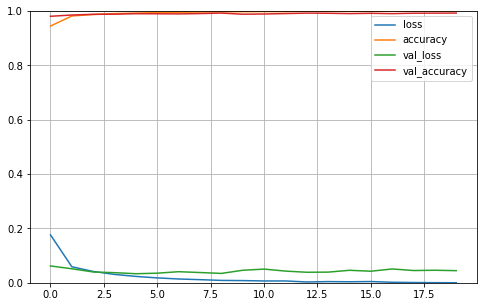

In [53]:
import pandas as pd

pd.DataFrame(histories[best_model_idx].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

Summary of our best model, model 9 <br>
number of epochs is 20 <br>
size of batch is 32 <br>
stochastic SGD with a learning rate of 0.1 and a momentum of 0.9 <br>
we used ReLU as our activation fucntion in all the layers except for the outplut layer wher we used a softmax activation function <br>
our architecture is as follow: <br>
our first conc layer was 32 filters of size 3x3 followed by a max pool layer <br>
the second conv layer is 32 filters of size 5x5 also followed by a max pool layer <br>
we chose 1 FC layer consisting of 32 neurons followed by an output layer.

